In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram  # For hierarchical clustering
from sklearn.cluster import DBSCAN  # For DBSCAN clustering
from sklearn.decomposition import PCA


In [2]:
# Define a function to mimic the functionality of 'tools.display_dataframe_to_user'
def display_dataframe_to_user(name, dataframe):
    """
    Displays the dataframe with a title.

    Args:
        name (str): The name or title to display above the dataframe.
        dataframe (pd.DataFrame): The pandas DataFrame to display.
    """
    print(f"\n{name}:\n")
    print(dataframe)


In [3]:
# Load the dataset
file_path = '/content/EastWestAirlines.xlsx'
data = pd.read_excel(file_path, sheet_name=0)


In [4]:
# Display the first few rows to understand the structure
data.head()


,East-West Airlines is trying to learn more about its customers. Key issues are their,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,"flying patterns, earning and use of frequent f...",NaN,NaN,NaN,NaN
1,card. The task is to identify customer segmen...,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,Source: Based upon real business data; company...,NaN,NaN,NaN,NaN


In [6]:
# Reload with skipping unnecessary rows to find the dataset
dataActual = pd.read_excel(file_path, sheet_name=0, skiprows=5)

# Display the first few rows of the assumed dataset
dataActual.head()

,Source: Based upon real business data; company names have been changed.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,(c) 2016 Galit Shmueli and Peter Bruce,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,Field Name,Data Type,Max Data Length,Raw Data or Telcom Created Field?,Description
4,ID#,NUMBER,NaN,Telcom,Unique ID


In [7]:
sheets = pd.ExcelFile(file_path).sheet_names
sheets


['Description', 'data']

In [8]:
# Load the "data" sheet which likely contains the structured dataset
data = pd.read_excel(file_path, sheet_name='data')

# Display the first few rows of the actual data
data.head()


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [9]:
# 1: Checking for missing the values
missingValues = data.isnull().sum()


In [12]:
# 2: To detect and remove outliers using the IQR method
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Removing rows where values fall outside 1.5 * IQR range for any numerical column
outlierFree_data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [13]:
# 3: Scale features using StandardScaler for uniformity
scaler = StandardScaler()
scaledData = pd.DataFrame(
    scaler.fit_transform(outlierFree_data.iloc[:, 1:]),  # Exclude non-numeric ID#
    columns=outlierFree_data.columns[1:]
)


In [15]:
# Display results of preprocessing
display_dataframe_to_user(name="Missing Values Report", dataframe=missingValues) # Using our custom function
display_dataframe_to_user(name="Preprocessed and Scaled Data", dataframe=scaledData) # Using our custom function



Missing Values Report:

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

Preprocessed and Scaled Data:

       Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    -0.438859         0.0  -0.719055        0.0        0.0    -0.783131   
1    -0.647735         0.0  -0.719055        0.0        0.0    -0.780130   
2    -0.128773         0.0  -0.719055        0.0        0.0    -0.494075   
3    -0.752607         0.0  -0.719055        0.0        0.0    -0.759268   
4    -0.714019         0.0  -0.719055        0.0        0.0    -0.795867   
...        ...         ...        ...        ...        ...          ...   
2870 -0.665761         0.0  -0.719055        0.0        0.0    -0.171862   
2871  0.411806         0.0  -0.719055        0

In [16]:
# 4: Summary statistics of scaled data
summaryStats = scaledData.describe()

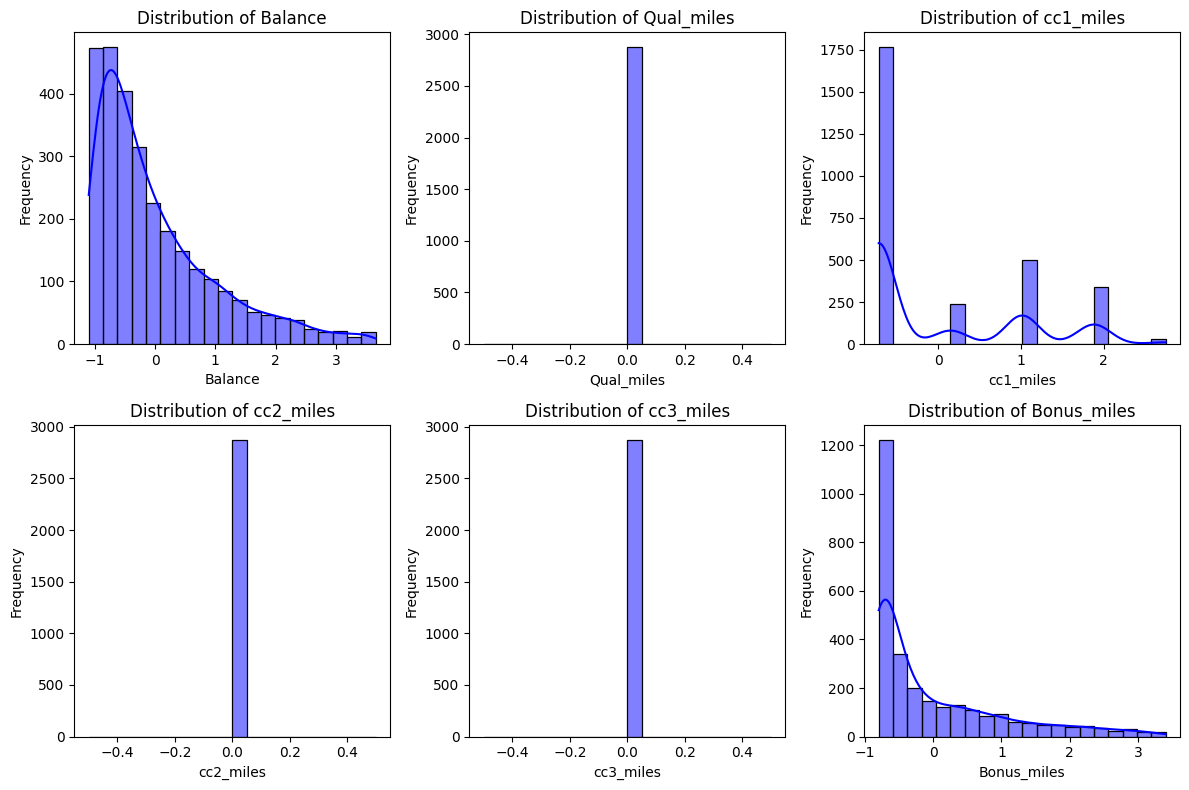

In [17]:
# 5: Distribution plots for key variables
plt.figure(figsize=(12, 8))
for i, column in enumerate(scaledData.columns[:6], 1):  # Plot first 6 features for brevity
    plt.subplot(2, 3, i)
    sns.histplot(scaledData[column], kde=True, bins=20, color='blue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


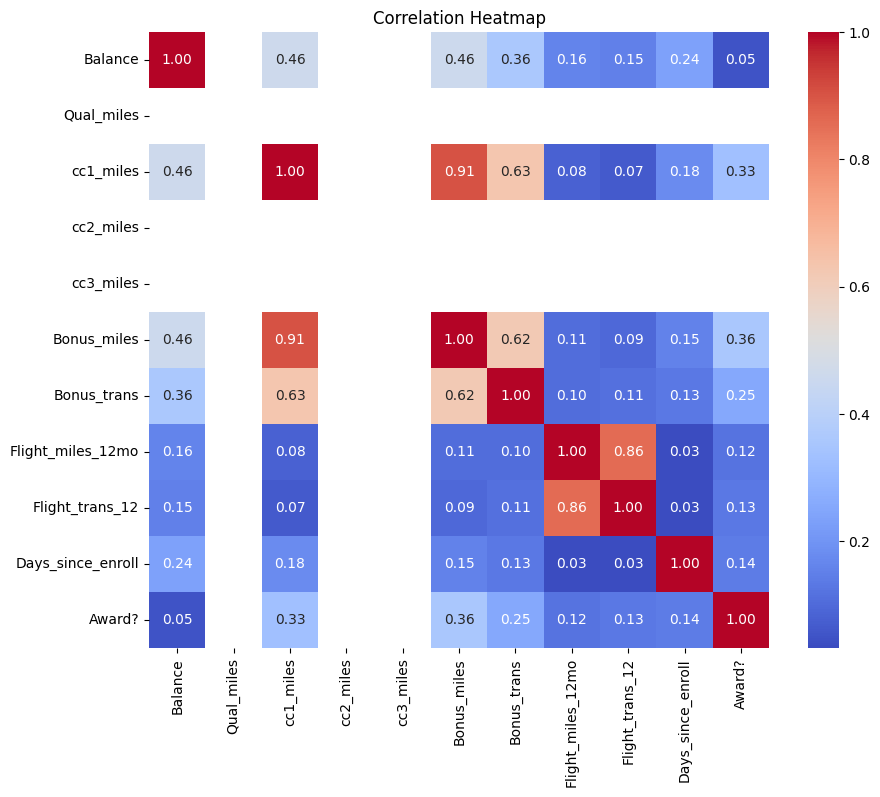

In [18]:
# 6: Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(scaledData.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [19]:
# Display summary statistics
display_dataframe_to_user(name="Summary Statistics of Scaled Data", dataframe=summaryStats) # Using our custom function



Summary Statistics of Scaled Data:

            Balance  Qual_miles     cc1_miles  cc2_miles  cc3_miles  \
count  2.875000e+03      2875.0  2.875000e+03     2875.0     2875.0   
mean  -7.908650e-17         0.0 -7.908650e-17        0.0        0.0   
std    1.000174e+00         0.0  1.000174e+00        0.0        0.0   
min   -1.098253e+00         0.0 -7.190547e-01        0.0        0.0   
25%   -7.408945e-01         0.0 -7.190547e-01        0.0        0.0   
50%   -3.171815e-01         0.0 -7.190547e-01        0.0        0.0   
75%    4.492551e-01         0.0  1.013789e+00        0.0        0.0   
max    3.656806e+00         0.0  2.746632e+00        0.0        0.0   

        Bonus_miles   Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
count  2.875000e+03  2.875000e+03       2.875000e+03     2.875000e+03   
mean  -5.931487e-17  8.402940e-17       1.482872e-17     2.965744e-17   
std    1.000174e+00  1.000174e+00       1.000174e+00     1.000174e+00   
min   -7.958670e-01 -1.210728e+

In [20]:
################# IMPLEMENT CLUSTER ALOGORITHM #############################

# Reload the dataset
data = pd.read_excel(file_path, sheet_name='data')


In [21]:
# Fill missing values with median
data.fillna(data.median(), inplace=True)

In [22]:
# Scale the data
scaler = StandardScaler()
scaled_data = pd.DataFrame(
    scaler.fit_transform(data.iloc[:, 1:]),  # Exclude non-numeric ID#
    columns=data.columns[1:]
)


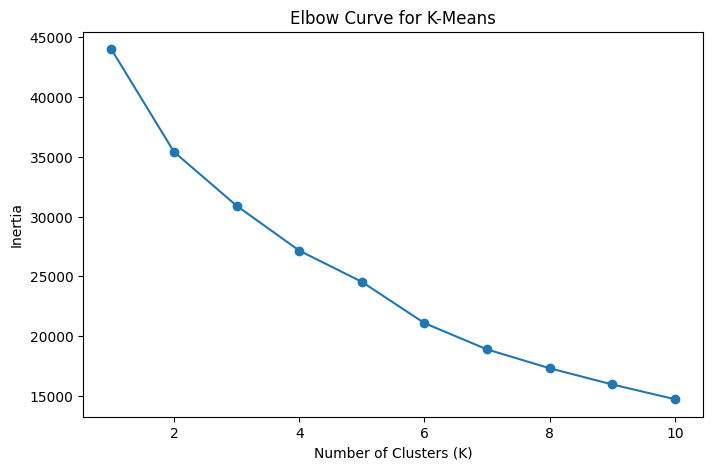

In [23]:
# implement clustering algorithms

# i: K-Means Clustering
try:
    inertia = []
    K_values = range(1, 11)
    for k in K_values:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(scaled_data)
        inertia.append(kmeans.inertia_)

    # Plot Elbow Curve
    plt.figure(figsize=(8, 5))
    plt.plot(K_values, inertia, marker='o')
    plt.title("Elbow Curve for K-Means")
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Inertia")
    plt.show()

    # Apply K-Means with optimal K (assume 3 based on typical use case)
    optimal_k = 3
    kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
    kmeans_labels = kmeans_optimal.fit_predict(scaled_data)
except Exception as e:
    print(f"Error in K-Means: {e}")


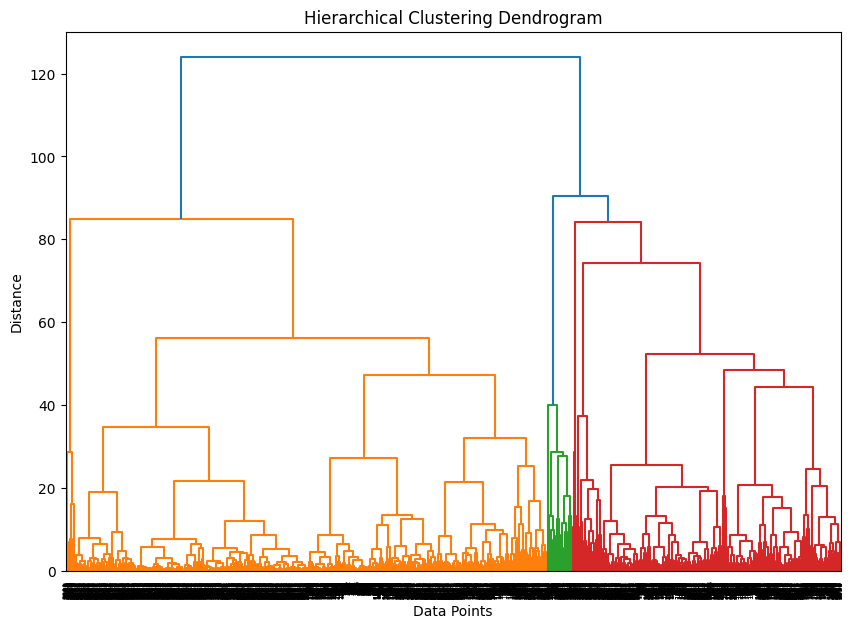

In [24]:
# ii: Hierarchical Clustering
try:
    linkage_matrix = linkage(scaled_data, method='ward')
    plt.figure(figsize=(10, 7))
    dendrogram(linkage_matrix)
    plt.title("Hierarchical Clustering Dendrogram")
    plt.xlabel("Data Points")
    plt.ylabel("Distance")
    plt.show()

    # Extract clusters
    hierarchical_labels = fcluster(linkage_matrix, t=7, criterion='distance')
except Exception as e:
    print(f"Error in Hierarchical Clustering: {e}")


In [25]:
# iii: DBSCAN
try:
    dbscan = DBSCAN(eps=0.5, min_samples=5)
    dbscan_labels = dbscan.fit_predict(scaled_data)
except Exception as e:
    print(f"Error in DBSCAN: {e}")


In [26]:
# Combine results
clustering_results = pd.DataFrame({
    "K-Means_Labels": kmeans_labels if 'kmeans_labels' in locals() else None,
    "Hierarchical_Labels": hierarchical_labels if 'hierarchical_labels' in locals() else None,
    "DBSCAN_Labels": dbscan_labels if 'dbscan_labels' in locals() else None
})


In [27]:
# Display results
#tools.display_dataframe_to_user(name="Clustering Results", dataframe=clustering_results)
display_dataframe_to_user(name="Clustering Results", dataframe=clustering_results) # Using the custom function



Clustering Results:

      K-Means_Labels  Hierarchical_Labels  DBSCAN_Labels
0                  1                   16              0
1                  1                   16              0
2                  1                   16              0
3                  1                   16              0
4                  0                   85             -1
...              ...                  ...            ...
3994               1                   22              1
3995               1                   22              1
3996               0                   78             -1
3997               1                   11              0
3998               1                   10              0

[3999 rows x 3 columns]


In [28]:
########### Visualization ########################################

#Reload the dataset
data = pd.read_excel(file_path, sheet_name='data')


In [29]:
# Fill missing values with median
data.fillna(data.median(), inplace=True)

In [30]:
# Scale the data
scaler = StandardScaler()
scaled_data = pd.DataFrame(
    scaler.fit_transform(data.iloc[:, 1:]),  # Exclude non-numeric ID#
    columns=data.columns[1:]
)


In [31]:
# Step 1: K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(scaled_data)


In [32]:
# Step 2: Hierarchical Clustering
linkage_matrix = linkage(scaled_data, method='ward')
hierarchical_labels = fcluster(linkage_matrix, t=3, criterion='maxclust')


In [33]:
# Step 3: DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)


In [34]:
# Add cluster labels to the dataset
data['KMeans_Cluster'] = kmeans_labels
data['Hierarchical_Cluster'] = hierarchical_labels
data['DBSCAN_Cluster'] = dbscan_labels


In [35]:
# Visualization of Clusters: Use first two PCA components for 2D visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(15, 5))


<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

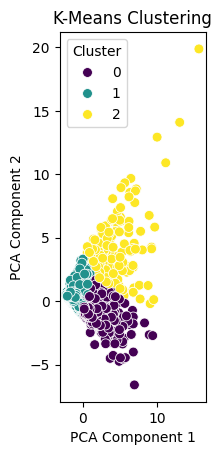

In [36]:
# Plot K-Means Clusters
plt.subplot(1, 3, 1)
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=kmeans_labels, palette="viridis", s=50)
plt.title("K-Means Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")


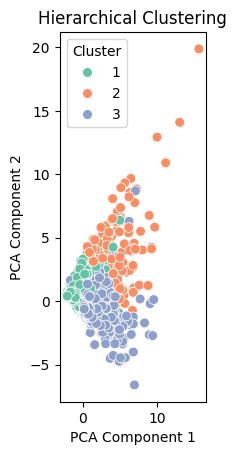

In [37]:
# Plot Hierarchical Clusters
plt.subplot(1, 3, 2)
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=hierarchical_labels, palette="Set2", s=50)
plt.title("Hierarchical Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")


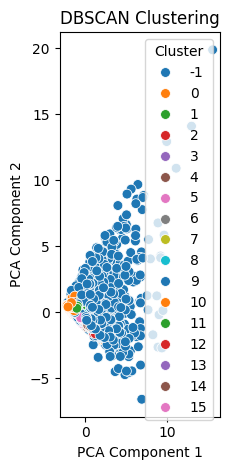

In [38]:
# Plot DBSCAN Clusters
plt.subplot(1, 3, 3)
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=dbscan_labels, palette="tab10", s=50)
plt.title("DBSCAN Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")

plt.tight_layout()
plt.show()


In [39]:
######### Evaluation and Performance Metrics:  ##############

from sklearn.metrics import silhouette_score
# Load the dataset
data = pd.read_excel(file_path, sheet_name='data')


In [40]:
# Fill missing values
data.fillna(data.median(), inplace=True)


In [41]:
# Scale the data
scaler = StandardScaler()
scaled_data = pd.DataFrame(
    scaler.fit_transform(data.iloc[:, 1:]),  # Exclude non-numeric ID#
    columns=data.columns[1:]
)


In [42]:
# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(scaled_data)


In [43]:
# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)


In [44]:
# Evaluate Clustering
kmeans_silhouette = silhouette_score(scaled_data, kmeans_labels)
dbscan_silhouette = (
    silhouette_score(scaled_data, dbscan_labels)
    if len(set(dbscan_labels)) > 1 else "N/A (Insufficient clusters)"
)


In [45]:
# Print results
print("K-Means Silhouette Score:", kmeans_silhouette)
print("DBSCAN Silhouette Score:", dbscan_silhouette)


K-Means Silhouette Score: 0.31110680893107867
DBSCAN Silhouette Score: -0.07834757831741163
